# Posteriors

1. The posteriors are well formed
1. Recast the mode frequency resuts in terms of the mass and spin of the remnant
    1. If computing the mass and spin given the QNM frequency is difficult, express the QNM model in terms of the mass and spin. 
1. Compute the QLM mass and spins of the remnant
1. Campare the two.
1. Given the higher order QNM mode, construct a two mode QNM model.
1. Should the second mode be an overtone or a higher harmonic? 
1. Compute evidences for the two-mode fit vs a single mode fit. 
1. Plot a Q transform of the residue
1. Is there a way to assign a residual SNR to the residual data over the gaissian noise?
1. Is there a test of the Gaissian process?




# Algorithm

## Option 1
1. Choose M such that f_lower is 20Hz in the data
1. Hopefully f_max will be within 1000Hz
1. Now construct waveform TD model such that f_lower is 20Hz
1. the stopping point is duration 4s
1. Sample in mass ratio and total mass.


## Option 2

1. Prepare signal as before
1. Use bilby injection

## Option 3
1. Prepare a signal with a mass such that the duration is known e.g. 0.5s. Need not be a whole number
1. The prepared signal should have the target sampling frequency
1. The TD model will have 5 parameters. 
    1. The overall amplitude
    1. The initial phase
    1. the two masses
    1. t_start : the starting time of the waveform before the merger
    

In [1]:
%%bash
df -h .

Filesystem      Size  Used Avail Use% Mounted on
beegfs_nodev    175T  161T   15T  92% /mnt/pfs


In [73]:
import warnings

warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np

import gwpy

print(gwpy.__version__)

import matplotlib.pyplot as plt

3.0.8


In [74]:
%%bash
hostname

sonic13


In [75]:
from gwosc.datasets import event_gps

gps0 = event_gps("GW150914") + 10
print(gps0)

1126259472.4


In [76]:
segment0 = (int(gps0) - 0.2, int(gps0) + 0.2)

In [77]:
print(segment0)

(1126259471.8, 1126259472.2)


In [78]:
sf = 4096

In [79]:
from gwpy.timeseries import TimeSeries

# ldata0 = TimeSeries.fetch_open_data('L1', *segment0, verbose=True)

# data_file_name = "Entire_noise_ts_gpsT1126259462_R200_D8_S4096_A1.txt"
data_file_name = "Entire_noise_ts_gpsT1126259462_R512_D16_S4096_A0.5.txt"

req_duration = 30

ldata0f = TimeSeries.read(data_file_name)[: req_duration * sf]

In [80]:
N0 = len(ldata0f)
# N1 = len(ldata1)

N0  # , N1

122880

In [81]:
N0 / 4096

30.0

In [82]:
# ldata1.write("GW150914_af_16s.txt")

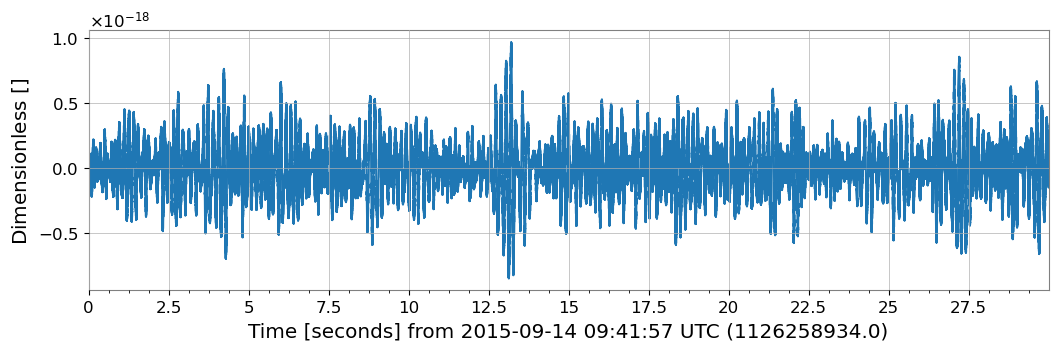

In [83]:
plot0 = ldata0f.plot()

In [84]:
np.mean(ldata0f)

<Quantity -1.83237903e-22>

In [85]:
ldata0f.times[-1] - ldata0f.times[0]

<Quantity 29.99975586 s>

In [189]:
# Cij_file_name = "Cij_gpsT1126259462_R200_D8_S4096_A1.npy"
Cij_file_name = f"Cij_gpsT1126259462_R512_D16_S4096_A0.67333984375_N100.npy"

In [280]:
Cij = np.array(np.load(Cij_file_name), dtype=np.float64)

In [281]:
Cij.shape

(2758, 2758)

In [282]:
np.linalg.det(Cij)

0.0

In [283]:
Cij * 1e38

array([[5.65800595, 5.61813175, 5.5395764 , ..., 0.37451005,
        0.35765047, 0.31412738],
       [5.61813175, 5.65800595, 5.61813175, ..., 0.36351605,
        0.37451005, 0.35765047],
       [5.5395764 , 5.61813175, 5.65800595, ..., 0.33506857,
        0.36351605, 0.37451005],
       ...,
       [0.37451005, 0.36351605, 0.33506857, ..., 5.65800595,
        5.61813175, 5.5395764 ],
       [0.35765047, 0.37451005, 0.36351605, ..., 5.61813175,
        5.65800595, 5.61813175],
       [0.31412738, 0.35765047, 0.37451005, ..., 5.5395764 ,
        5.61813175, 5.65800595]])

In [284]:
Lij = np.linalg.cholesky(Cij)

In [285]:
Lij

array([[ 2.37865633e-19,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.36189300e-19,  2.81899612e-20,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.32886791e-19,  4.17151784e-20,  2.45692071e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.57446052e-20, -2.96370697e-21, -7.83066866e-21, ...,
         1.97672385e-21,  0.00000000e+00,  0.00000000e+00],
       [ 1.50358192e-20,  6.87481881e-21, -6.23819362e-21, ...,
         1.86392003e-21,  1.97672274e-21,  0.00000000e+00],
       [ 1.32060849e-20,  1.62245239e-20, -2.94317868e-22, ...,
         1.51428987e-21,  1.86390321e-21,  1.97666647e-21]])

In [286]:
inv_Lij = np.linalg.inv(Lij)

# Inject signal in the noise

In [197]:
time_axis = np.array(ldata0f.times) - np.array(ldata0f.times)[0]

In [245]:
ans_dur = 0.67333984375

In [246]:
time_axis[40]

0.009765625

In [247]:
full_data = ldata0f

In [248]:
len(time_axis)

122880

In [249]:
def whiten(x):

    return np.dot(inv_Lij, x)


def inner_product(x, y):

    xbar = whiten(x)
    ybar = whiten(y)

    return np.dot(xbar, ybar)

# Load signal for injection

In [254]:
sstart = 0
# signal_data = np.genfromtxt(f"shear_dimf_inspiral_q0p5a0_v_M82.14591367187434_fl13.59781020745857.txt")
shear_data = np.genfromtxt("shear_dimf_inspiral_q0p5a0_v_M120.4868112454328.txt")

# signal_data = np.genfromtxt('shear_dimf_q0p5a0_v_M129.56648825838127_ss25.txt')

# signal_data = np.genfromtxt('shear_dimf_q0p5a0_v_M129.56648825838127_ss45.txt')


shear_t = shear_data[:, 0]
shear_p = shear_data[:, 1]
shear_x = shear_data[:, 2]

delta_t_orig = shear_t[1] - shear_t[0]

orig_dur = shear_t[-1] - shear_t[0]

deficit = ans_dur - orig_dur

to_add = round(deficit / delta_t_orig)

print("Length of the original shear dat is ", len(shear_t))
print("Duration of original shear is ", orig_dur)
print("Deficit time is ", deficit)
print("delta_t original is ", delta_t_orig)
print("N to add is ", to_add)

Length of the original shear dat is  2759
Duration of original shear is  0.6733398437499977
Deficit time is  2.3314683517128287e-15
delta_t original is  0.00024414062499999924
N to add is  0


In [255]:
signal_data.shape

(2755, 3)

In [256]:
ans_nsam

2757

In [257]:
delta_t_orig * len(shear_t)

0.6735839843749979

In [258]:
1 / delta_t_orig

4096.000000000013

In [259]:
delta_t_orig, 1 / 4096

(0.00024414062499999924, 0.000244140625)

In [260]:
ans_dur

0.67333984375

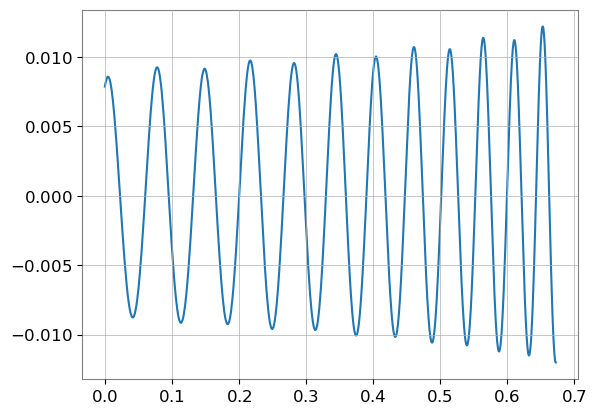

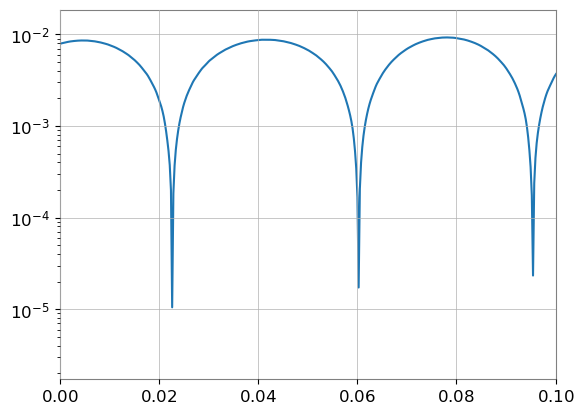

Shear original sampling frequency is  4097.485134155185


In [262]:
# meanp = np.mean(shear_p[-50:])
# meanx = np.mean(shear_x[-50:])
# meanp = np.mean(shear_p[300:450])

# shear_p -= meanp
# shear_x #-= np.mean(shear_x[-100:])

ans_nsam = int(sf * ans_dur)

if to_add > 0:

    zro = np.zeros(ans_nsam - len(shear_t))

    shear_p = np.array(list(shear_p) + list(zro))
    shear_x = np.array(list(shear_x) + list(zro))
    shear_t = np.linspace(0, ans_dur, ans_nsam)

    print(len(shear_p))
plt.plot(shear_t, shear_p)
plt.show()

fig, ax = plt.subplots()
ax.set_yscale("log")
ax.plot(shear_t, abs(shear_p))
plt.xlim(0, 0.1)
plt.show()

shear_sf = len(shear_t) / ans_dur
print("Shear original sampling frequency is ", shear_sf)

In [263]:
ans_dur

0.67333984375

In [264]:
ans_nsam

2758

In [265]:
ans_nsam

2758

In [266]:
target_sf = sf
print(target_sf)

4096


In [267]:
shear_t[-1]

0.6733398437499977

In [268]:
0.67333984375 * 4096

2758.0

In [269]:
2758

2758

In [270]:
# shear_t_re = np.linspace(0, shear_t[-1], target_sf)

## Resample to required frequency

In [271]:
# from scipy.interpolate import interp1d

# shear_p_int = interp1d(shear_t, shear_p)

# shear_p_re = shear_p_int(shear_t_re)


# shear_x_int = interp1d(shear_t, shear_x)
# shear_x_re = shear_x_int(shear_t_re)


# fig, ax = plt.subplots()
# ax.set_yscale('log')
# ax.plot(shear_t, abs(shear_p))
# ax.scatter(shear_t_re, abs(shear_p_re),s=5, c='red')
# ax.set_xlim(0, 0.025)
# plt.show()

In [272]:
t_start = 8

nzeros_before = np.zeros(t_start * sf - 1)
nzeros_after = np.zeros(int((req_duration - t_start - ans_dur) * sf))

raw_signal = np.array(list(nzeros_before) + list(shear_p) + list(nzeros_after))

In [273]:
t_start

8

In [274]:
len(raw_signal), ans_dur, len(full_data)

(122880, 0.67333984375, 122880)

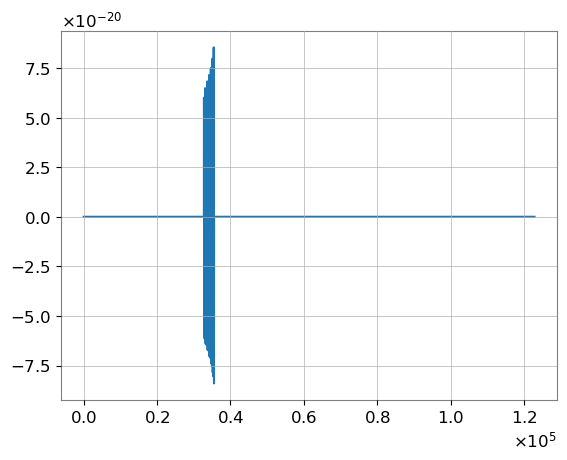

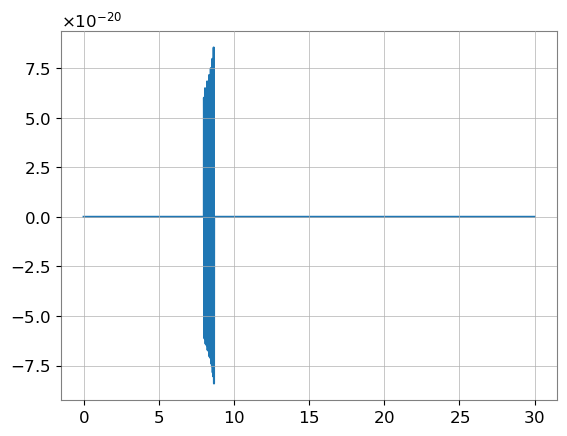

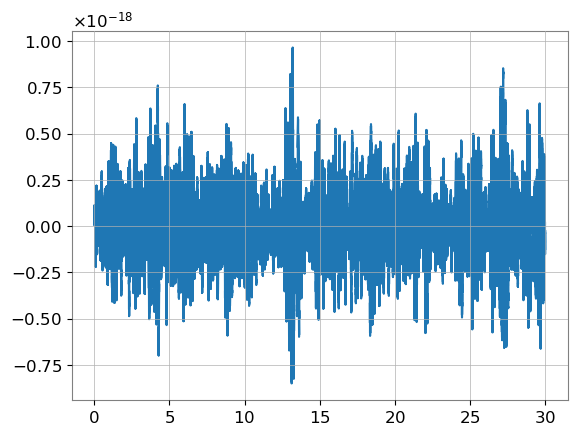

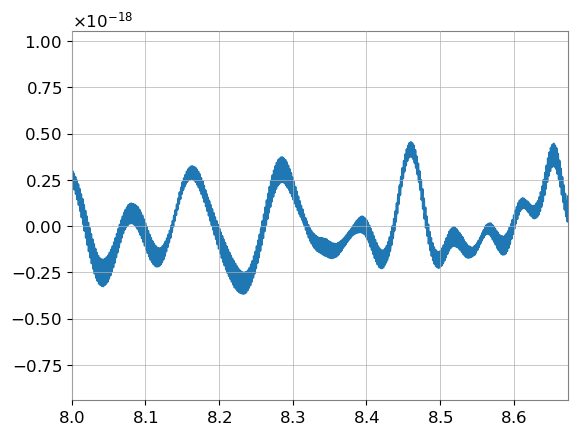

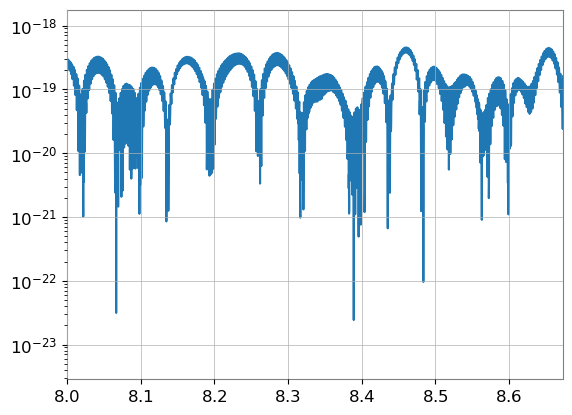

Matched filter SNR 32.251230314596434
Optimal SNR 42.61085432145643


In [294]:
# time_axis_0 = time_axis[req_duration*sf:(req_duration+1)*sf]
A0 = 7e-18

signal = A0 * raw_signal

plt.plot(signal)
plt.show()

analysis_data = full_data + signal  # - np.mean(full_data)

plt.plot(time_axis, signal)
# plt.xlim(t_start, t_start+ans_dur)
# plt.ylim(-2e-21, 2e-21)
plt.show()


plt.plot(time_axis, full_data)
# plt.xlim(t_start, t_start+ans_dur)
# plt.ylim(-2e-21, 2e-21)
plt.show()

plt.plot(time_axis, analysis_data)
plt.xlim(t_start, t_start + (ans_dur))
# plt.ylim(-2e-21, 2e-21)
plt.show()


plt.semilogy(time_axis, abs(analysis_data))
plt.xlim(t_start, t_start + (ans_dur))
# plt.ylim(-2e-21, 2e-21)
plt.show()

data_seg = analysis_data[t_start * sf : t_start * sf + int(ans_dur * sf)]
signal_seg = signal[t_start * sf : t_start * sf + int(ans_dur * sf)]
time_seg = time_axis[t_start * sf : t_start * sf + int(ans_dur * sf)]

# signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)
signal_seg_norm = inner_product(signal_seg, signal_seg)

# signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)

# data_sig_inner_prod = np.dot(data_seg, inv_Cij@signal_seg)
data_sig_inner_prod = inner_product(data_seg, signal_seg)

mf_snr = data_sig_inner_prod / np.sqrt(signal_seg_norm)

opt_snr = np.sqrt(inner_product(np.array(data_seg), np.array(data_seg)))

print("Matched filter SNR", mf_snr)
print("Optimal SNR", opt_snr)

In [295]:
len(signal_seg), len(data_seg)

(2758, 2758)

In [296]:
analysis_data = np.array(analysis_data)

In [297]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform

In [352]:
def time_domain_waveform_generator(pars):

    A, t_start, phase, mass1, mass2 = pars

    apx = "SEOBNRv4"
    # apx = 'IMRPhenomPv2'

    hp, hc = get_td_waveform(
        approximant=apx, mass1=mass1, mass2=mass2, delta_t=1.0 / 4096, f_lower=2
    )

    # Recenter the waveforms
    # Clip the waveforms
    max_loc = np.argmax(hp**2 + hc**2)

    max_time = hp.sample_times[max_loc]

    full_time_axis = np.array(hp.sample_times) - max_time

    n_t_start = round(t_start * 4096)
    n_ele = round(ans_dur * 4096)

    start_ind = max_loc - n_t_start
    end_ind = start_ind + n_ele

    # print('Start end ind', start_ind, end_ind)
    time_axis = full_time_axis[start_ind:end_ind]
    signal_p = A * np.array(hp)[start_ind:end_ind]
    signal_x = A * np.array(hc)[start_ind:end_ind]

    signal = signal_p - 1j * signal_x

    phase_orig = np.unwrap(np.angle(signal))

    phase0 = phase_orig[0]

    signal2 = signal * np.exp(1j * (phase - phase0))

    phase02 = np.unwrap(np.angle(signal2))[0]

    # print("Final phase is ", phase02, "Requested phase is ", phase)

    # print("Max time is ", max_time)

    # plt.scatter(time_axis, signal_p ,s=1)
    # plt.show()

    # print(len(signal2))
    return signal2.real

Start end ind 610643 613401


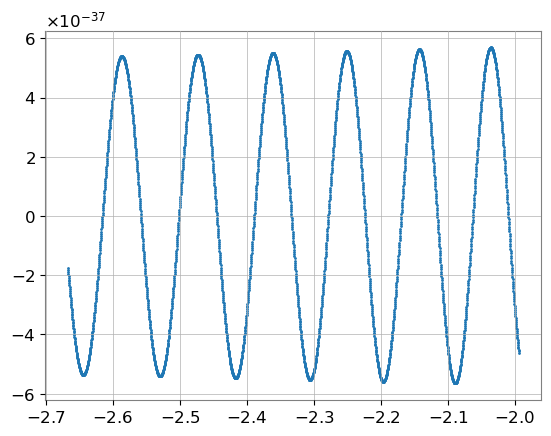

array([-2.15511055e-37, -2.09003242e-37, -2.02458304e-37, ...,
        9.27734903e-38,  1.01019313e-37,  1.09244297e-37])

In [350]:
time_domain_waveform_generator(
    [1.68062463e-18, 2.66750602e00, 1.98487996e00, 3.73368633e01, 9.18656339e01]
)

In [334]:
time_domain_waveform_generator(
    [1.68062463e-18, 2.66750602e00, 1.98487996e00, 3.73368633e01, 9.18656339e01]
)

Start end ind -3817.104657919999 -1059.1046579199992


TypeError: slice indices must be integers or None or have an __index__ method

In [245]:
x0 = np.array([A0, omega0, gamma0, t0, phi0])

In [246]:
mass0 = 0
spin0 = 0

In [300]:
t_start

8

In [301]:
ans_nsam

2758

In [354]:
def TimeDomainLogLiklihood(X):

    signal = time_domain_waveform_generator(X)

    t = t_start

    tloc = np.argmin(abs(time_axis - t))

    # print(tloc)

    tloc_end = tloc + ans_nsam

    data = analysis_data[tloc:tloc_end]
    cdata = data - np.mean(data)

    # print(len(cdata), len(signal))

    delta = cdata - signal

    LnP = (-1 / 2) * (inner_product(delta, delta))

    return LnP

In [310]:
TimeDomainLogLiklihood([1, 1, 1, 10, 10])

2758
2758 2758


-5565.244240149904

In [313]:
A0

7e-18

In [355]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 5


def ptform(u):

    x = np.array(u)

    x[0] = -5e-17 + u[0] * 10e-17

    x[1] = ans_dur + 0.01 + u[1] * 5

    x[2] = -np.pi + u[2] * 2 * np.pi

    x[3] = 25 + u[3] * 35
    x[4] = 60 + u[4] * 35

    # x[0] = -5e-16 + u[0]*10e-16
    # x[0] =
    # x[1] =  4 + u[0]*8
    # x[2] =  u[1]*8

    # x[1] = u[1]*25
    # x[1] = -15 + u[1]*30

    # x[2] = -15 + u[2]*30
    # x[2] = u[2]*20
    # x[2] = gps0 +12 + u[2]*6
    # x[3] = gps0 + 0.1 - 8 + u[3]*7

    # x[3] = -2.5 + u[3]*5

    # x[4] = -np.pi/2 + u[4]*2*np.pi/2

    return x

In [323]:
120 * 0.333

39.96

In [324]:
120 * 0.666

79.92

In [325]:
omega_exp

NameError: name 'omega_exp' is not defined

In [326]:
A0, omega0, gamma0, t0, phi0

NameError: name 'omega0' is not defined

In [327]:
from dynesty import NestedSampler

In [362]:
sampler = NestedSampler(TimeDomainLogLiklihood, ptform, ndim, nlive=100)

In [363]:
sampler.run_nested()

182it [1:48:22, 35.73s/it, +100 | bound: 0 | nc: 1 | ncall: 1230 | eff(%): 24.956 | loglstar:   -inf < -916.437 <    inf | logz: -916.443 +/-    nan | dlogz:  0.001 >  0.109]


In [253]:
3e-3 * 4096

12.288

In [34]:
import dynesty

In [358]:
from dynesty import DynamicNestedSampler

In [359]:
dsampler = DynamicNestedSampler(
    TimeDomainLogLiklihood, prior_transform=ptform, ndim=ndim
)

In [12]:
dsampler = DynamicNestedSampler.restore("/mnt/pfs/vaishak.p/bilby/q0p5a0_single_x.h5")

In [360]:
dsampler.run_nested(checkpoint_file=f"runs/q0p5a0_inspiral.h5")

0it [00:00, ?it/s]Traceback (most recent call last):
  File "/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/dynesty/dynesty.py", line 910, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_3767076/2575183970.py", line 3, in TimeDomainLogLiklihood
    signal = time_domain_waveform_generator(X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_3767076/579611266.py", line 8, in time_domain_waveform_generator
    hp, hc = get_td_waveform(approximant=apx,
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/pycbc/waveform/waveform.py", line 598, in get_td_waveform
    return wav_gen(**input_params)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/pycbc/waveform/waveform.py", 

Exception while calling loglikelihood function:
  params: [3.06889792e-17 1.21261533e+00 7.12972365e-01 4.95022696e+01
 8.82993237e+01]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [55]:
dsampler.run_nested(resume=True)

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/dynesty/dynamicsampler.py:2034: RuntimeWarning: You tried to resume the run that has ended successfully.
This is not supported. No sampling was performed
  warnings.warn(


In [364]:
res = sampler.results
results = res

In [365]:
help(dyplot)

NameError: name 'dyplot' is not defined

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gw/lib/python3.11/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


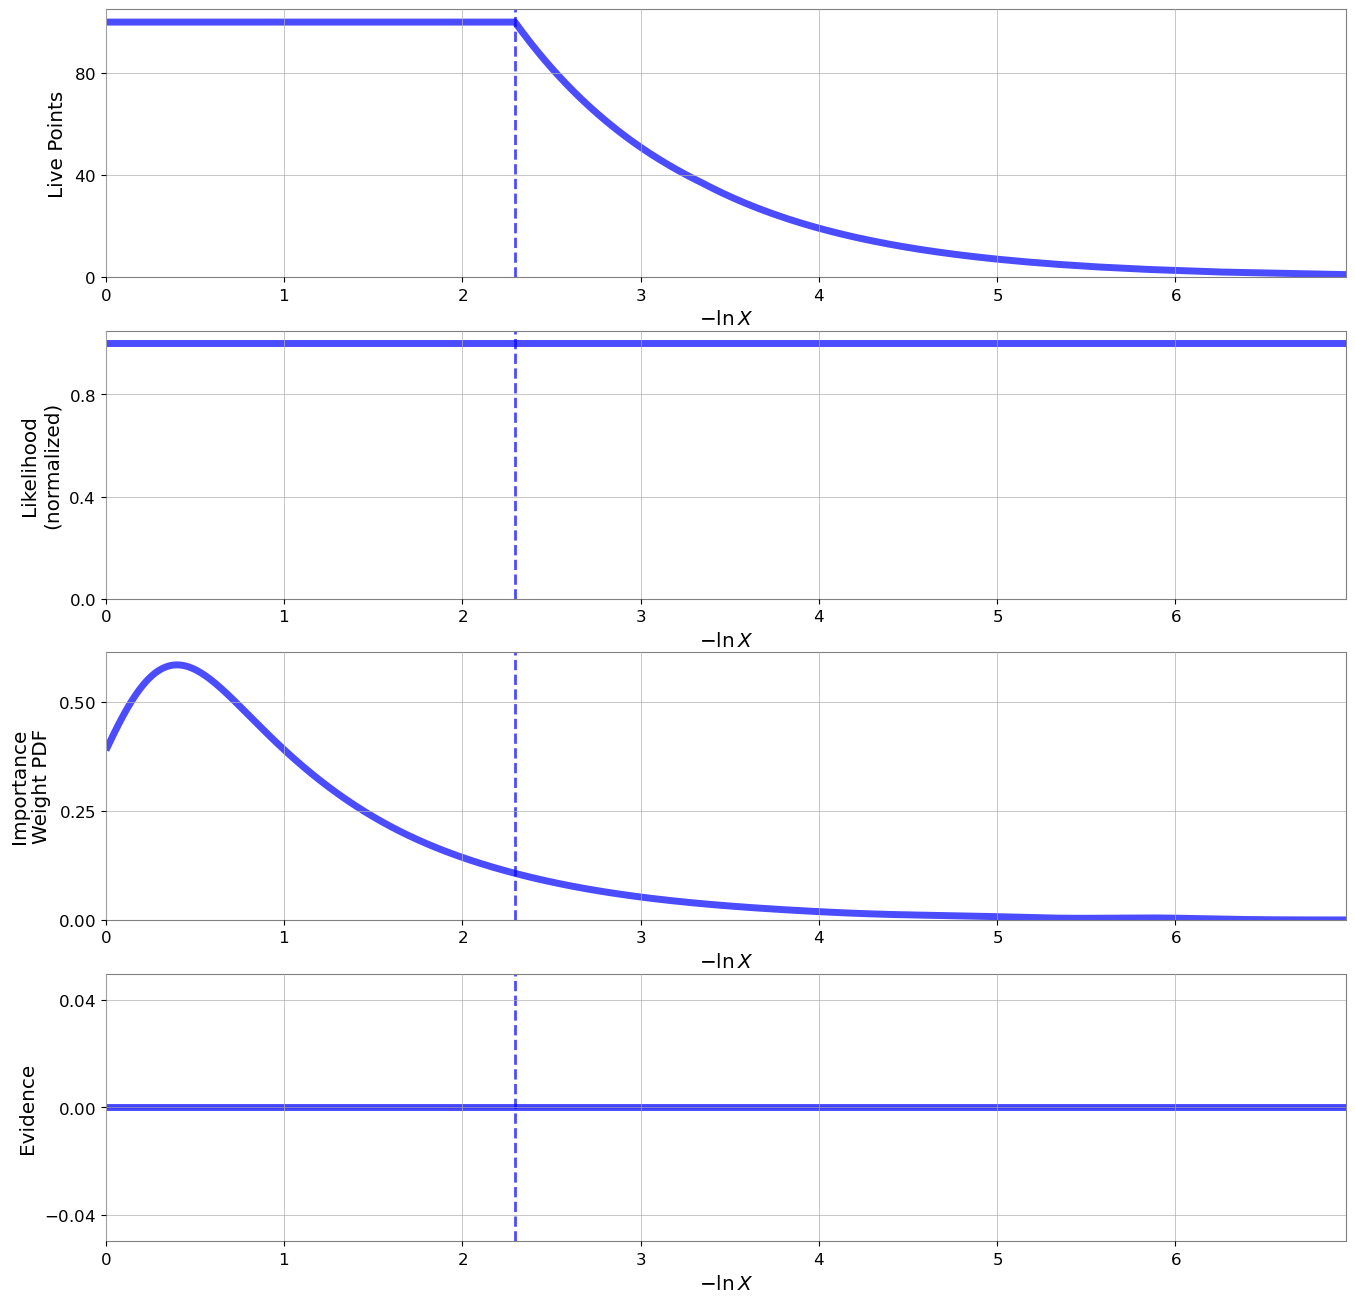

In [366]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(res)

In [117]:
results.ev

<bound method Results.summary of          niter: 13764
         ncall: array([1, 1, 1, ..., 1, 1, 1])
           eff: 7.3552358762798455
       samples: array([[-4.60361110e-17,  8.90492042e+02,  2.80346490e+01,
        -9.84618364e-01],
       [-4.33029594e-17,  7.80129482e+02,  3.10510848e+01,
        -7.94112188e-01],
       [-3.87765629e-17,  9.67732870e+02,  4.49901573e+01,
         8.33207556e-01],
       ...,
       [-7.85704357e-19,  8.94222525e+02,  1.55270942e+02,
         1.19904470e+00],
       [-7.86631931e-19,  8.94679641e+02,  1.54598081e+02,
         1.19636294e+00],
       [-7.85756431e-19,  8.94305169e+02,  1.55662277e+02,
         1.19513656e+00]])
    samples_id: array([2238, 2234, 2213, ..., 1888,   19, 1878])
 samples_batch: array([44, 44, 44, ..., 37,  0, 37])
    samples_it: array([12174, 12174, 12174, ..., 10762,  1434, 10776])
     samples_u: array([[0.03963889, 0.89049204, 0.02803465, 0.18658624],
       [0.06697041, 0.78012948, 0.03105108, 0.24722624],
     

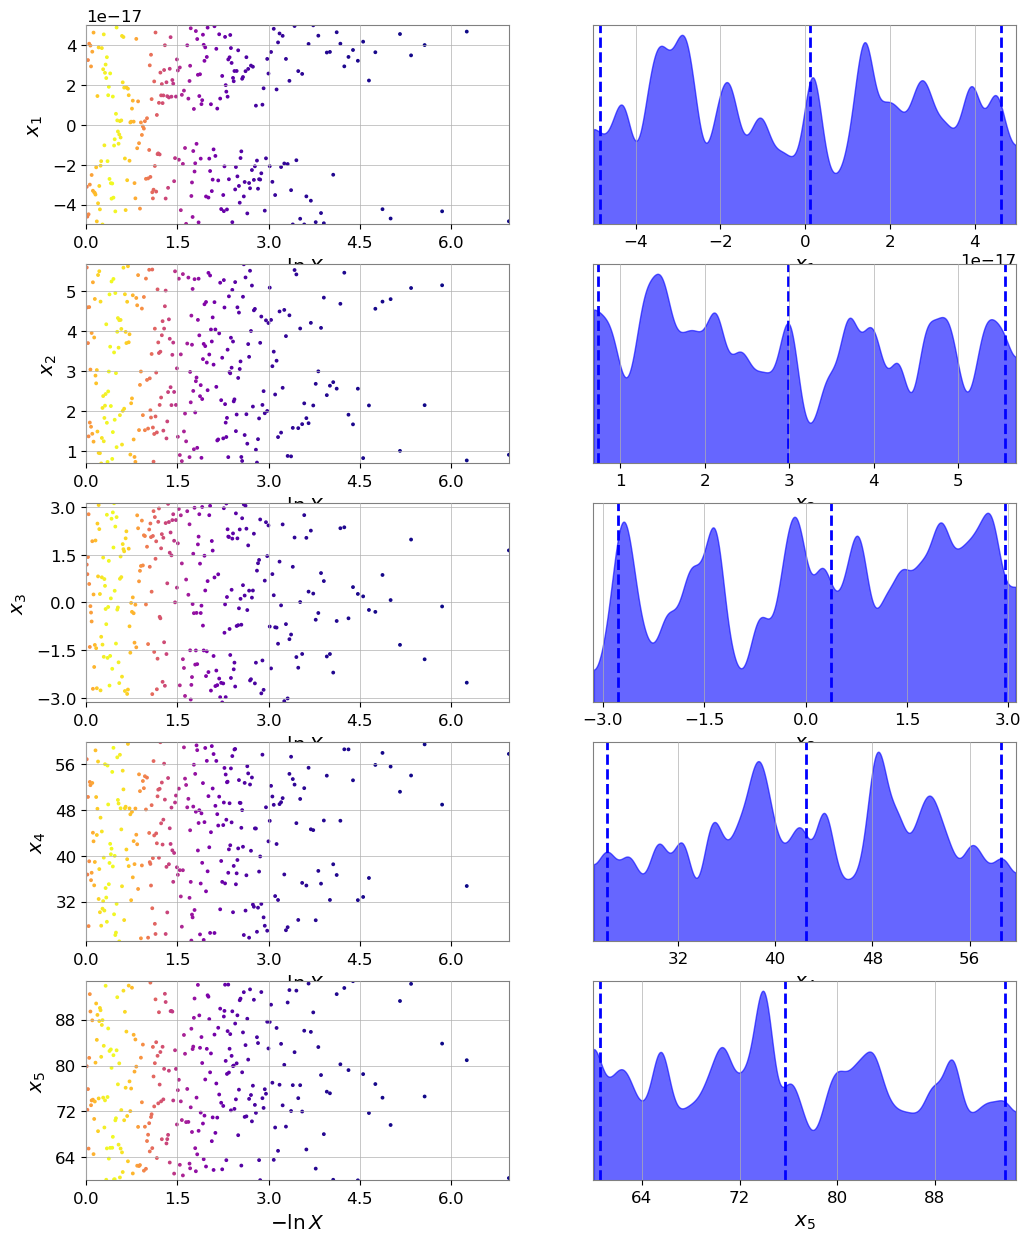

In [367]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(
    res
)  # , truths=[0, 115.17992571677392, 0.576368470828952, 0])

In [258]:
0.576368470828952 / (0.96) ** 2

0.625399816437665

In [261]:
?dyplot.cornerplot

Signature:
dyplot.cornerplot(
    results,
    dims=None,
    span=None,
    quantiles=(0.025, 0.5, 0.975),
    color='black',
    smooth=0.02,
    quantiles_2d=None,
    hist_kwargs=None,
    hist2d_kwargs=None,
    labels=None,
    label_kwargs=None,
    show_titles=False,
    title_quantiles=(0.025, 0.5, 0.975),
    title_fmt='.2f',
    title_kwargs=None,
    truths=None,
    truth_color='red',
    truth_kwargs=None,
    max_n_ticks=5,
    top_ticks=False,
    use_math_text=False,
    verbose=False,
    fig=None,
)
Docstring:
Generate a corner plot of the 1-D and 2-D marginalized posteriors.

Parameters
----------
results : :class:`~dynesty.results.Results` instance
    A :class:`~dynesty.results.Results` instance from a nested
    sampling run. **Compatible with results derived from**
    `nestle <http://kylebarbary.com/nestle/>`_.

dims : iterable of shape (ndim,), optional
    The subset of dimensions that should be plotted. If not provided,
    all dimensions will be shown.

spa

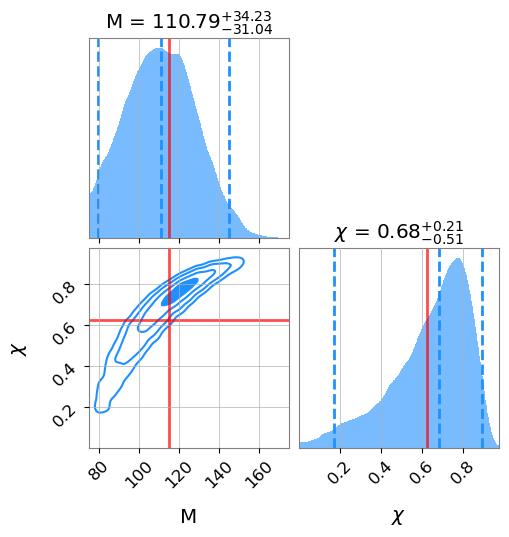

In [283]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(
    res,
    truths=[115.17992571677392, 0.6253],
    labels=["M", r"$\chi$"],
    show_titles=True,
    dims=[1, 2],
    color="dodgerblue",
)

cfig.savefig("q0p5a0_2dim.png")

In [266]:
caxes2 = caxes[1:-1]

In [267]:
caxes2

array([[<Axes: ylabel='M'>,
        <Axes: title={'center': 'M = ${110.79}_{-31.04}^{+34.23}$'}>,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='$\\chi$'>, <Axes: >,
        <Axes: title={'center': '$\\chi$ = ${0.68}_{-0.51}^{+0.21}$'}>,
        <Axes: >]], dtype=object)

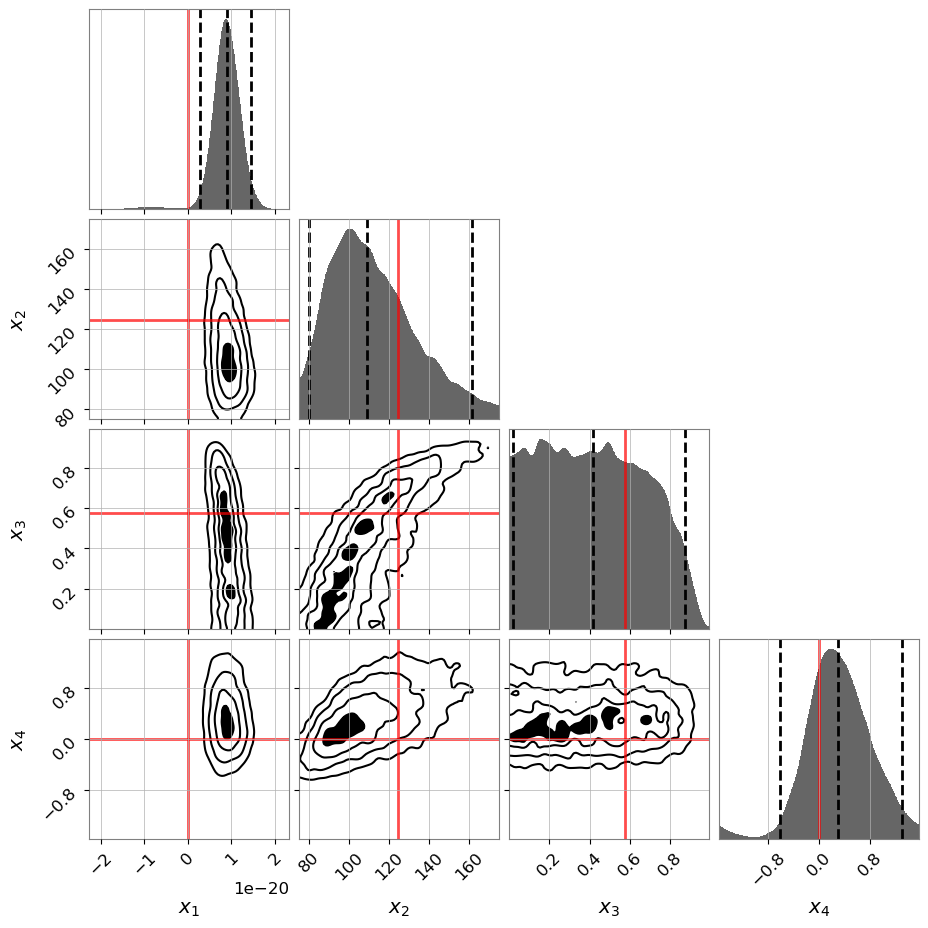

In [157]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(
    res, truths=[0, 124.58164372452148, 0.576368470828952]
)  # , truths=[0,0,0,0])

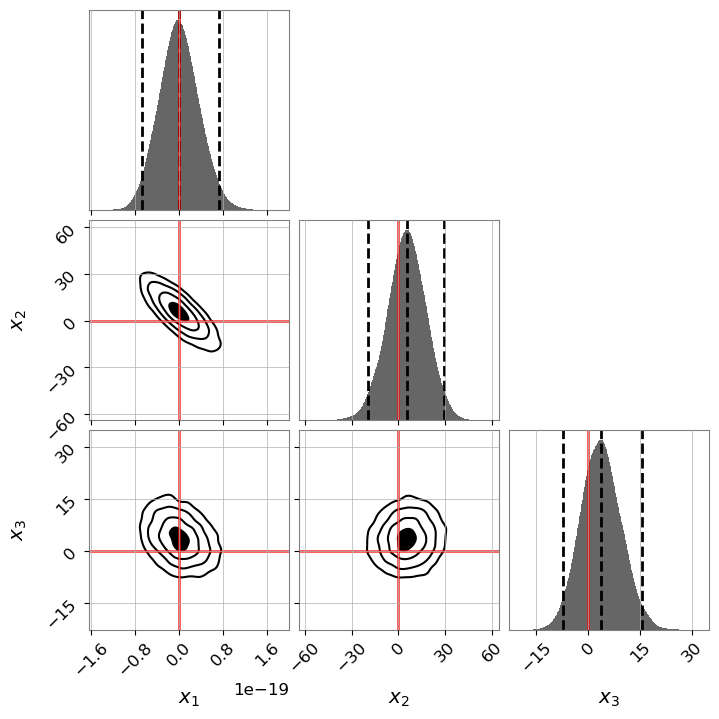

In [130]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0, 0, 0])

In [116]:
omega0, gamma0

(250, 250)

In [260]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights) for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas)

[-8.33657608e-20  1.10946840e+02  6.36872903e-01  4.88733174e-01]  +-  [2.510366875802707e-21, 17.201122656345444, 0.1898983410581463, 0.2765059693831038]


In [121]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights) for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas)

[-1.14531971e-19  1.08063981e+02  4.66711354e-01  4.28276922e-02]  +-  [2.8951286475290784e-21, 17.822358229524628, 0.2407526635747108, 0.2843278952189545]


In [86]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights) for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas)

[-8.33669971e-20  1.10867310e+02  6.34344231e-01  4.87838516e-01]  +-  [2.5249344057014485e-21, 17.56603273366599, 0.1944731943349988, 0.28015770594852346]


In [101]:
print(mean, " +- ", sigmas)

[-7.85976853e-19  8.94298141e+02  1.55374664e+02  1.19663016e+00]  +-  [3.3243183202578172e-21, 3.6475351625941212, 3.2324689985840185, 0.018136216895226095]


1e-18

In [102]:
t0

8

In [84]:
time_seg[0]

1126259360.0

In [106]:
mean

array([4.41788815, 3.75422018])

In [105]:
def get_damped_sinusoid(local_time_axis, pars):

    A, omega, gamma, t, phi = pars

    sig = (
        A
        * np.cos(omega * (local_time_axis - t) + phi)
        * np.exp(-gamma * (local_time_axis - t))
    )

    return sig

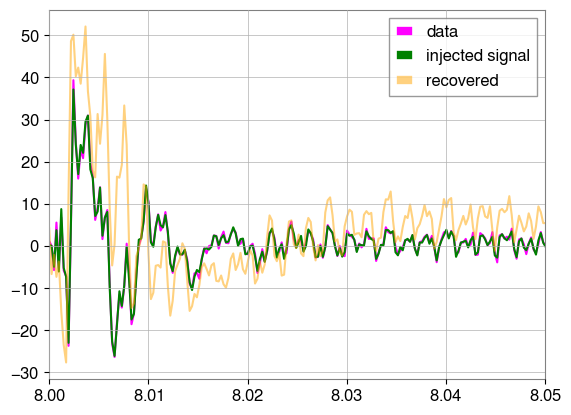

In [115]:
rec_signal_seg = get_damped_sinusoid(
    time_seg, [A0, omega0 + mean[0], gamma0 + mean[1], t0, phi0]
)

plt.plot(time_seg, inv_Lij @ data_seg, label="data", c="magenta")
plt.plot(time_seg, inv_Lij @ signal_seg, label="injected signal", c="green")
# plt.scatter(time_seg, inv_Lij@rec_signal_seg, marker='x', c='orange', label='recovered')
plt.plot(time_seg, inv_Lij @ rec_signal_seg, c="orange", label="recovered", alpha=0.5)
plt.legend()
plt.xlim(8, 8.05)
plt.show()

In [226]:
import scipy

In [227]:
np.mean(samples.T * weights)

-3.835724480904094e-06

In [228]:
t0

1126259294.0

In [137]:
1.54898278e03 / (2 * np.pi)

246.52826620122585

In [67]:
mean

array([4.41788815, 3.75422018])

In [49]:
x0

NameError: name 'x0' is not defined

In [51]:
mean

array([-1.02596196e-19, -1.17745312e+00,  3.47519253e-02,
       -2.17097859e-01,  1.70983762e-02])

In [53]:
x0

array([1.00000000e-19, 2.70000000e+02, 5.00000000e+01,
       1.12625936e+09, 0.00000000e+00])

In [54]:
mean / x0

/tmp/ipykernel_2546272/317067153.py:1: RuntimeWarning: divide by zero encountered in divide
  mean/x0


array([-1.02596196e+00, -4.36093747e-03,  6.95038505e-04,
       -1.92760093e-10,             inf])

In [115]:
mean[2] - t0

-0.005499124526977539

In [78]:
cov

array([[ 1.05514598e-34, -5.15381450e-19, -4.18746220e-20,
         4.21599871e-19, -1.29365460e-18],
       [-5.15381450e-19,  3.34527585e+01, -8.10469897e-01,
         5.05175687e-03, -1.95935039e-01],
       [-4.18746220e-20, -8.10469897e-01,  7.19377876e+00,
         1.49118873e-03, -2.83245980e-03],
       [ 4.21599871e-19,  5.05175687e-03,  1.49118873e-03,
         2.42176516e-02, -5.76196049e-02],
       [-1.29365460e-18, -1.95935039e-01, -2.83245980e-03,
        -5.76196049e-02,  1.68934261e-01]])

In [83]:
t0 - 1.12625940e09

76.0

In [ ]:
A

1e-18

In [ ]:
phi0

1.0471975511965976

In [ ]:
-1.58880414e00

-1.58880414

In [ ]:
s0 = A * np.cos(omega * (time_axis - t0) + phi0) * np.exp(-gamma * (time_axis - t0))

In [ ]:
A1, omega1, gamma1, t1, phi1 = mean

In [ ]:
s0 = A * np.cos(omega * (time_axis - t0) + phi0) * np.exp(-gamma * (time_axis - t0))

In [ ]:
s1 = A1 * np.cos(omega1 * (time_axis - t1) + phi1) * np.exp(-gamma1 * (time_axis - t1))

In [ ]:
s1 = A1 * np.cos(omega1 * (time_axis - t0) + phi1) * np.exp(-gamma1 * (time_axis - t0))

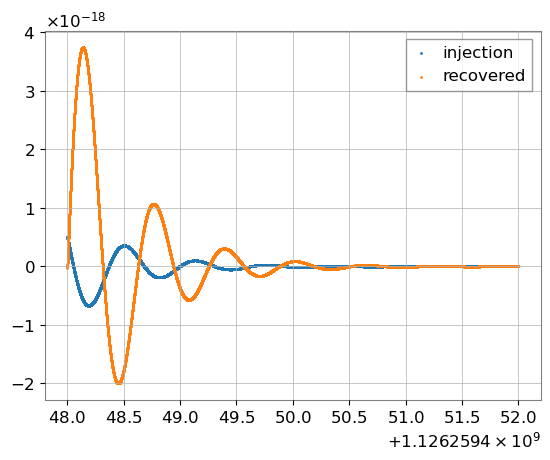

In [ ]:
plt.scatter(time_axis, s0, label="injection", s=1)
plt.scatter(time_axis, s1, label="recovered", s=1)
plt.legend()
plt.show()

In [1]:
import random
import numpy as np

random.seed(0)
N = 10000

V = np.array([[1, 2], [2, 5]])

B = np.linalg.cholesky(V)
A = np.array([1, 2])

# norm() return one number from standard normal distribution
n1 = np.array([random.gauss(0, 1) for _ in range(10000)])
n2 = np.array([random.gauss(0, 1) for _ in range(10000)])
res = np.array([n1, n2]).T.dot(B.T) + A

np.cov(res.T).round()

array([[1., 2.],
       [2., 5.]])

In [3]:
res.shape

(10000, 2)